# Jon Williamson

# 425005368

# CSCE 421: Project Winning Percent Models

## Preprocessing




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [3]:
df = pd.read_csv('master_data.csv', index_col=0)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Kromer,2012,45,0,9,0,0,9,0,0,...,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5,0.333333,0
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0,0.218750,-1
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature No.</th>
    <th class="tg-fymr">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-0pky">Age at hiring</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-0pky">Number of times previously hired as head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-0pky">Number of years’ experience as college position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-0pky">Number of years’ experience as college coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5</td>
    <td class="tg-0pky">Number of years’ experience as college head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">6</td>
    <td class="tg-0pky">Number of years’ experience as NFL position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">7</td>
    <td class="tg-0pky">Number of years’ experience as NFL coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8</td>
    <td class="tg-0pky">Number of years’ experience as NFL head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">9</td>
    <td class="tg-0pky">Demotion presence in hiring history</td>
  </tr>
  <tr>
    <td class="tg-c3ow">10</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">11</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">12</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized giveaway rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">13</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">14</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">15</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized turnover rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">16</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized yardage differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">17</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized point differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">18</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized turnover ratio rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">19</td>
    <td class="tg-0pky">Hiring team’s average winning percentage in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">20</td>
    <td class="tg-0pky">Hiring team’s average normalized turnover ratio rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">21</td>
    <td class="tg-0pky">Hiring team’s average normalized point differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">22</td>
    <td class="tg-0pky">Hiring team’s average normalized yard differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">23</td>
    <td class="tg-0pky">Hiring team’s average divisional placement in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">24</td>
    <td class="tg-0pky">Hiring team’s number of playoff appearances in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">25</td>
    <td class="tg-0pky">Hiring team’s number of playoff wins in previous two years</td>
  </tr>
</tbody>
</table>

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because coaches are rarely an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 10-18 and 20-23 were normalized based on the number of teams in the rank. Each of these features' original forms was of $x \text{ out of }z$, where $x$ is the rank of the attribute by team out of $z$ total teams. In order to convert this rank to a normalized value, the following equation was used:
$$
f(x,z) = \frac{z-x}{z-1}
$$
This equation linearly distributes score from 1 at the best rank to 0 at the worst rank. For example, a team that places 2nd out of 4 teams in their division is assigned the following score for a single instance of their divisional performance:
$$
f(2,4) = \frac{4-2}{4-1}\\
f(2,4) = \frac{2}{3}\\
f(2,4) \approx .667
$$
This normalization should roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

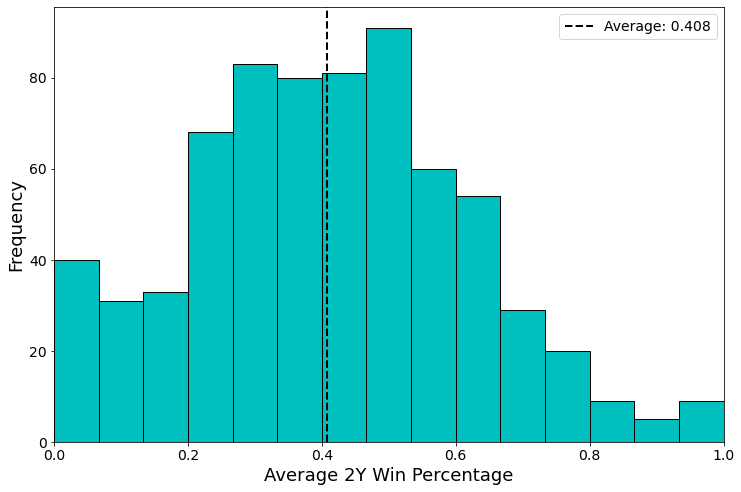

In [5]:
raw_win_pct = df['Avg 2Y Win Pct'].values.T
raw_win_pct_mean = np.mean(raw_win_pct)
plt.hist(raw_win_pct, bins=15, color='c', edgecolor='k')
plt.axvline(raw_win_pct_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(raw_win_pct_mean))
plt.xlim(0,1)
plt.xlabel('Average 2Y Win Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Another consideration, although not analyzed in the model, is the change in the average 2Y winning percentage for each team based on the HC hire. Feature 19 is the hiring team's average percentage prior to the hire. Thus, subtracting this feature from the aforementioned label yields an improvement in winning percentage.

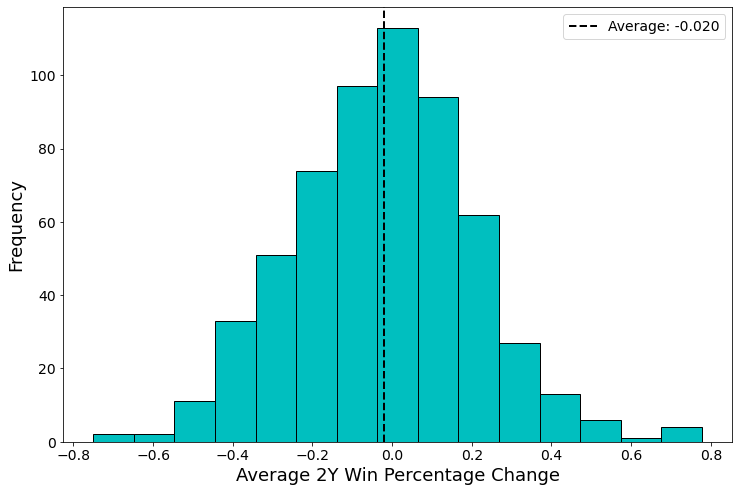

In [6]:
prev_win_pct = df['Feature 19'].values.T
win_pct_improvement = raw_win_pct - prev_win_pct
win_pct_improvement = win_pct_improvement[~np.isnan(win_pct_improvement)]
win_pct_improvement_mean = np.mean(win_pct_improvement)
plt.hist(win_pct_improvement, bins=15, color='c', edgecolor='k')
plt.axvline(win_pct_improvement_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(win_pct_improvement_mean))
#plt.xlim(0,1)
plt.xlabel('Average 2Y Win Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
X = df.iloc[:,2:-2]
y = df.iloc[:,-2]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25
0,45,0,9,0,0,9,0,0,0,NaN,...,NaN,NaN,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5
1,47,0,0,0,0,12,0,0,0,NaN,...,NaN,NaN,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0
2,38,0,0,0,0,5,3,0,0,0.752688,...,NaN,NaN,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0
3,41,1,0,0,0,5,3,3,0,0.752688,...,0.129032,0.139785,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0
4,44,0,8,0,12,0,0,0,0,NaN,...,NaN,NaN,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0


In [8]:
y.head(5)

0    0.333333
1    0.267857
2    0.500000
3    0.218750
4    0.745455
Name: Avg 2Y Win Pct, dtype: float64

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The 3x3 white boxes in the matrix show that the correlation between Features 10-12 and 13-15 have no correlation. This is expected, as Features 10-12 are based on performance as an offensive coordinator, while features 13-15 are from performance as a defensive coordinator. No coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

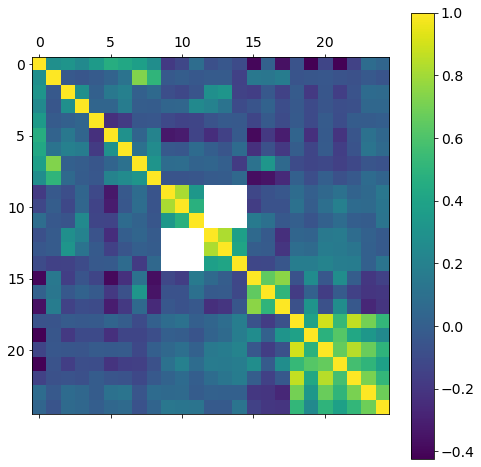

In [9]:
plt.matshow(X.corr())
plt.colorbar()
plt.show()

Holding out 20% of data for testing:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True)

## Model 1: Linear Regression with Lasso Regularization

Necessary Imports:

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [12]:
result_dict = { 'alpha_':       [],
                'coef_':        [],
                'train_score':     [],
                'test_score':    [],
                'alphas_':      [],
                'mse_path_':    [],
                'intercept_':   []
}

num_of_folds = 10
max_iter = 1e6

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = LassoCV(eps=1e-5, n_alphas=1000, max_iter=max_iter, verbose=True).fit(X_train__, y_train_)
    result_dict['alpha_'].append(model.alpha_)
    result_dict['intercept_'].append(model.intercept_)
    result_dict['coef_'].append(model.coef_)
    result_dict['alphas_'].append(model.alphas_)
    result_dict['mse_path_'].append(model.mse_path_)
    result_dict['test_score'].append(mean_squared_error(y_test_, model.predict(X_test__)))
    result_dict['train_score'].append(mean_squared_error(y_train_, model.predict(X_train__)))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Thew following graph shows the convergence of the mse in the internal cross-validation.

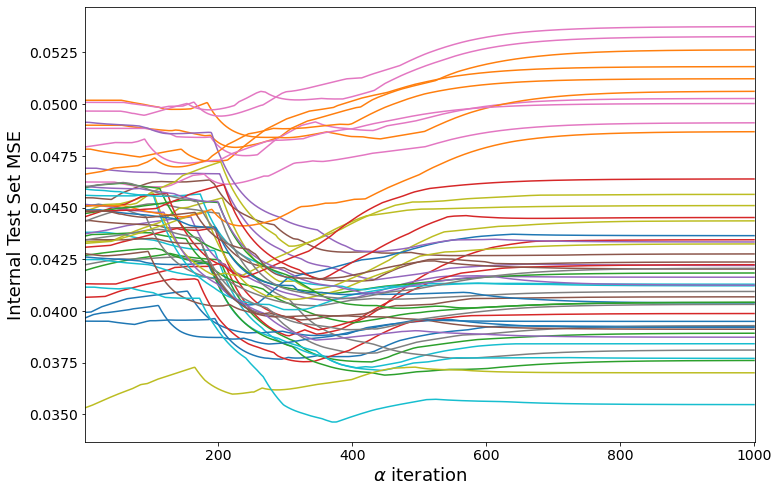

In [13]:
list_length = 0
for mse_list in result_dict['mse_path_']:
    list_length = len(mse_list)
    plt.plot(np.arange(1, list_length + 1), mse_list)
plt.xlim(1, list_length + 1)
plt.xlabel(R'$\alpha$' + ' iteration')
plt.ylabel('Internal Test Set MSE')
plt.show()

The following code prints the average mean squared error value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient, also including the intercept for the model. 

In [14]:
print('Average Train MSE: {:.3f}\nAverage Test MSE: {:.3f}'.format(np.mean(result_dict['train_score']), np.mean(result_dict['test_score'])))

Average Train MSE: 0.039
Average Test MSE: 0.042


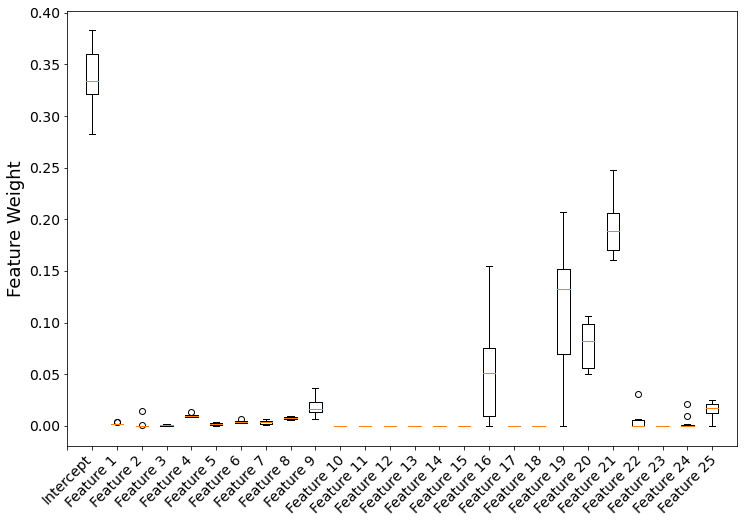

In [68]:
coef_list = [np.abs(l) for l in zip(*result_dict['coef_'])]
coef_list.insert(0, np.abs(result_dict['intercept_']))
label_list = list(X.columns.values)
label_list.insert(0, 'Intercept')
label_list.append("")
plt.boxplot(coef_list)
plt.xlim(0, len(coef_list) + 1)
plt.xticks(np.arange(0, len(label_list)), labels=label_list, rotation='45', )
plt.ylabel('Feature Weight')
plt.show()

In [16]:
feature_name_dict = {
    "Feature 1":    "Age at hiring",
    "Feature 2":    "Number of times previously hired as head coach",
    "Feature 3":    "Number of years’ experience as college position coach",
    "Feature 4":    "Number of years’ experience as college coordinator",
    "Feature 5":    "Number of years’ experience as college head coach",
    "Feature 6":    "Number of years’ experience as NFL position coach",
    "Feature 7":    "Number of years’ experience as NFL coordinator",
    "Feature 8":    "Number of years’ experience as NFL head coach",
    "Feature 9":    "Demotion presence in hiring history",
    "Feature 10":   "During years as NFL OC, team’s average normalized yardage rank",
    "Feature 11":   "During years as NFL OC, team’s average normalized point rank",
    "Feature 12":   "During years as NFL OC, team’s average normalized giveaway rank",
    "Feature 13":   "During years as NFL DC, team’s average normalized yardage rank",
    "Feature 14":   "During years as NFL DC, team’s average normalized point rank",
    "Feature 15":   "During years as NFL DC, team’s average normalized turnover rank",
    "Feature 16":   "During years as NFL HC, team’s average normalized yardage differential rank",
    "Feature 17":   "During years as NFL HC, team’s average normalized point differential rank",
    "Feature 18":   "During years as NFL HC, team’s average normalized turnover ratio rank",
    "Feature 19":   "Hiring team’s average winning percentage in previous two years",
    "Feature 20":   "Hiring team’s average normalized turnover ratio rank in previous two years",
    "Feature 21":   "Hiring team’s average normalized point differential rank in previous two years",
    "Feature 22":   "Hiring team’s average normalized yard differential rank in previous two years",
    "Feature 23":   "Hiring team’s average divisional placement in previous two years",
    "Feature 24":   "Hiring team’s number of playoff appearances in previous two years",
    "Feature 25":   "Hiring team’s number of playoff wins in previous two years"
}

In [49]:
feature_avg_weight_dict = dict(zip(label_list[1:-1], [np.mean(l) for l in zip(coef_list[1:])]))
feature_std_weight_dict = dict(zip(label_list[1:-1], [np.std(l) for l in zip(coef_list[1:])]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.1938 with a std. dev. of 0.0295.
Rank  2: Hiring team’s average winning percentage in previous two years (Feature 19), has an avg. importance of 0.1133 with a std. dev. of 0.0591.
Rank  3: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.0790 with a std. dev. of 0.0215.
Rank  4: During years as NFL HC, team’s average normalized yardage differential rank (Feature 16), has an avg. importance of 0.0536 with a std. dev. of 0.0478.
Rank  5: Demotion presence in hiring history (Feature 9), has an avg. importance of 0.0179 with a std. dev. of 0.0086.
Rank  6: Hiring team’s number of playoff wins in previous two years (Feature 25), has an avg. importance of 0.0150 with a std. dev. of 0.0082.
Rank  7: Number of years’ experience as college coordinator (Feature 4), has an avg. importance of 0.0098 wit

The MSE values are recorded for each model because they are the values minimized by the `LassoCV` loss function. The units of MSE, being the square of the units of the measure, make understanding model performance more challenging. As a result, RMSE is often used to better understand model performance. These scores are printed below:

In [50]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(result_dict['train_score'])), np.sqrt(np.mean(result_dict['test_score']))))

Average Train RMSE: 0.197
Average Test RMSE: 0.204


In [75]:
from sklearn.linear_model import Lasso
plot_pred = None
model = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    model = Lasso(alpha=np.mean(result_dict['alpha_'])).fit(X_train__, y_train)
    plot_pred = model.predict(X_test__)

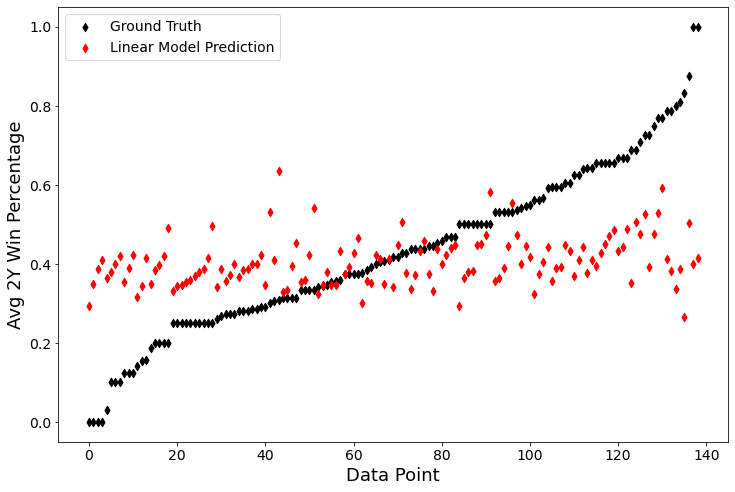

In [76]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='d', color='r', label='Linear Model Prediction')
plt.xlabel('Data Point')
plt.ylabel('Avg 2Y Win Percentage')
plt.legend()
plt.show()

In [77]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))

Average RMSE: 0.203


These results show that the regularized linear regression, on average, predicts the winning percent of coaching hires over their first two years within 20%. This is equivalent to 3 games in a 16 game season. Although the result of this model is surprising, it is likely that a standard regression with regularization is not sufficient to model the complex nature of this data given that its predictions center closely on the expected winning percentage. 

## Model 2: XGBoost Regressor

Necessary Imports:

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [85]:

xgbr_param_dict = {
    "n_estimators":     [1, 5, 10, 20, 50, 100],
    "learning_rate":    [.01, .05, .1, .15, .2, .25, .3],
    "max_depth":        [2, 4, 6, 8, 10, 12],
    "gamma":            [0, .01, .05, .1],
    "alpha":            [0, .01, .05, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [5, 10, 20],
    "learning_rate":    [.1, .5],
}
"""
xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

num_of_folds=10

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBRegressor(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    xgbr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    xgbr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 2876 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 4676 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 6876 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 9476 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 12476 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 15876 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 19676 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  2.4min finished
Fitting 5 folds for each of 4032 candidates, totalling 20160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Paralle

In [86]:
xgbr_best_params_dict

{'n_estimators': [100, 10, 50, 100, 100, 100, 100, 20, 100, 100],
 'learning_rate': [0.2, 0.3, 0.05, 0.1, 0.05, 0.05, 0.25, 0.15, 0.2, 0.1],
 'max_depth': [4, 6, 2, 6, 10, 12, 2, 8, 2, 6],
 'gamma': [0, 0.05, 0, 0.01, 0.1, 0.1, 0.01, 0.1, 0, 0.1],
 'alpha': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

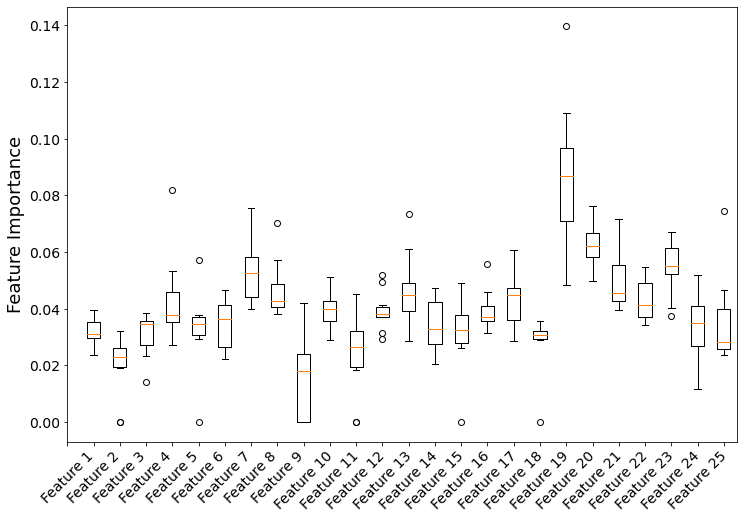

In [87]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = list(X.columns.values)
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(0, len(xgbr_label_list)), labels=xgbr_label_list, rotation='45', )
plt.ylabel('Feature Importance')
plt.show()

In [88]:
feature_avg_weight_dict = dict(zip(xgbr_label_list[0:-1], [np.mean(l) for l in zip(xgbr_coef_list)]))
feature_std_weight_dict = dict(zip(xgbr_label_list[0:-1], [np.std(l) for l in zip(xgbr_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: Hiring team’s average winning percentage in previous two years (Feature 19), has an avg. importance of 0.0873 with a std. dev. of 0.0238.
Rank  2: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.0627 with a std. dev. of 0.0072.
Rank  3: Hiring team’s average divisional placement in previous two years (Feature 23), has an avg. importance of 0.0543 with a std. dev. of 0.0091.
Rank  4: Number of years’ experience as NFL coordinator (Feature 7), has an avg. importance of 0.0534 with a std. dev. of 0.0113.
Rank  5: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.0507 with a std. dev. of 0.0115.
Rank  6: During years as NFL DC, team’s average normalized yardage rank (Feature 13), has an avg. importance of 0.0467 with a std. dev. of 0.0122.
Rank  7: Number of years’ experience as NFL head coach (Feature 8), has an avg. importance of 0.0466 with

In [89]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(xgbr_result_dict['train_score'])), np.sqrt(np.mean(xgbr_result_dict['test_score']))))

Average Train RMSE: 0.135
Average Test RMSE: 0.201


The previously printed RMSE values show that the heavily cross-validated XGBoost does not have a better performance on the testing set than the regularized linear regression. It does, hoowever, show an increased performance on the testing set. This result is surprising, and suggests that the features selected for this model may not be sufficient to accurately predict a team's winning percentage in the first two years following a head coach hire. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [90]:
plot_pred = None
xgbr = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    print(test_xgbr_best_params_dict)
    test_xgbr_best_params_dict.update(default_xgbr_params)
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBRegressor(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 2, 'gamma': 0.1, 'alpha': 0}


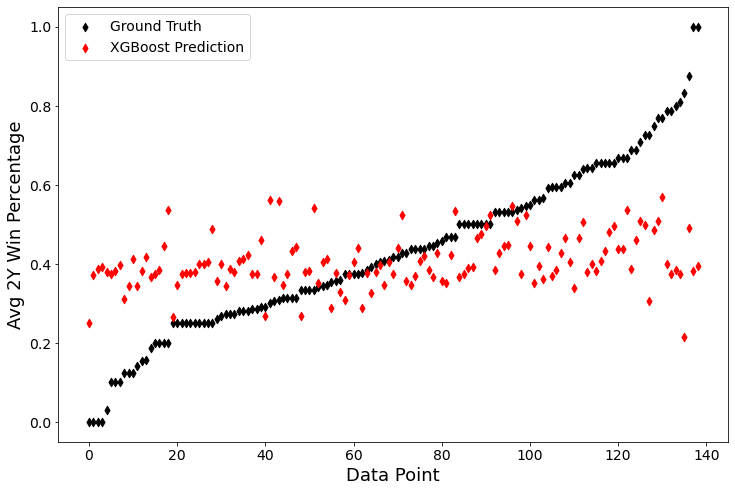

In [91]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='d', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point')
plt.ylabel('Avg 2Y Win Percentage')
plt.legend()
plt.show()

In [92]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))

Average RMSE: 0.204


The previous plot shows that the XGBoost model most often predicts the expected value of the winning percentage. Although this result is disappointing, the model's feature importance does provide some useful takeaways. These takeaways will be discussed in more detail in the final report. 

## Model 3: MLPRegressor

Necessary Imports:

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
"""
mlpr_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001, .01],
    "tol":              [1e-4, 1e-5],
    "max_iter":         [200, 300, 400, 500]
}
"""
mlpr_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001]
}

mlpr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

mlpr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}

default_mlpr_params = {
    'solver':       'lbfgs'
}

num_of_folds=2

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPRegressor(**default_mlpr_params), param_grid=mlpr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    #xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    mlpr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    mlpr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))